## This script contains Web Scraping logic to scrape all the Data Engineer jobs from Internet.

- The data scraped will be
  - Date, Job Name, Company, Link to apply,
- We will be using BeautifulSoup for this.

In [29]:
import requests
from bs4 import BeautifulSoup

In [30]:
url = "https://weworkremotely.com/remote-jobs"
response = requests.get(url)
print("Status: ", response.status_code)
print(response.text[:100])

Status:  200
<!DOCTYPE html><html><head><meta charset=utf-8 /><script>window.NREUM||(NREUM={});NREUM.info={"beaco


In [34]:
soup = BeautifulSoup(response.text, "html.parser")

jobs = soup.find_all("li", class_ = "new-listing-container")

print(jobs[0])

<li class="new-listing-container feature"><div class="highlight-bar"></div><div class="tooltip--flag-logo"><a href="/company/report-owl-llc"><div alt="Report Owl LLC is hiring a remote Remote Inside Sales at We Work Remotely." class="tooltip--flag-logo__flag-logo" loading="lazy" style="background-image:url(https://we-work-remotely.imgix.net/logos/0126/5280/logo.gif?ixlib=rails-4.0.0&amp;w=50&amp;h=50&amp;dpr=2&amp;fit=fill&amp;auto=compress)"></div><span class="tooltip--flag-logo__tooltiptext">View Company Profile</span></a></div><a href="/remote-jobs/report-owl-llc-remote-inside-sales-3"><div class="new-listing paid-logo"><div class="new-listing__header"><h3 class="new-listing__header__title"> Remote Inside Sales </h3><div class="new-listing__header__icons"><p class="new-listing__header__icons__date"><span class="new">New</span></p><img alt="" class="new-listing__header__icons__pinnedIcon" role="presentation" src="https://weworkremotely.com/assets/pin-new-listing-icon-f1eb7ca3238f0782

In [66]:
job_data = []

for job in jobs:
  title = job.find("h3", class_ = "new-listing__header__title")
  company = job.find("p", class_ = "new-listing__company-name")
  location = job.find("p", class_ = "new-listing__company-headquarters")
  link = job.find_all("a", href = True)
  date = job.find("p", class_ = "new-listing__header__icons__date").text.strip()
  date_new = parse_relative_data(date)

  if title or company or link:
    job_data.append({
        "title": title.text.strip(),
        "company": company.text.strip(),
        "location": location.text.strip() if location else "Not Listed",
        "url": "https://weworkremotely.com" + link[1]["href"] if link else "Not Listed/Coundn't Find",
        "date":date_new.strftime("%Y-%m-%d")
    })

In [63]:
jobs[10].find("p", class_ = "new-listing__header__icons__date").text.strip()


'22d'

In [55]:
import pandas as pd

In [67]:
df = pd.DataFrame(job_data)
df.head()

,title,company,location,url,date
0,Remote Inside Sales,Report Owl LLC,USA,https://weworkremotely.com/remote-jobs/report-...,2025-09-11
1,Senior Product Marketing Manager - Conversion ...,Circuit Routing Limited,Anywhere,https://weworkremotely.com/remote-jobs/circuit...,2025-09-11
2,Growth Lead,Forager,Los Angeles,https://weworkremotely.com/remote-jobs/forager...,2025-09-11
3,Remote Sales Representative - Work from home,Unload My Home,"Jacksonville, FL",https://weworkremotely.com/remote-jobs/unload-...,2025-09-08
4,Coding bootcamp - Job Guaranteed,Metana,Learn job-ready skills on your schedule with 1...,https://weworkremotely.comhttps://metana.io/fu...,2025-09-11


In [61]:
from datetime import datetime, timedelta

def parse_relative_data(date_str):
  now = datetime.now()
  if "d" in date_str:
    days = int(date_str.replace("d", ""))
    return now - timedelta(days=days)
  else:
    return now


In [60]:
# Extract the alphabetic part and get unique values from the resulting Series
print(df['date'].str.extract(r"([a-zA-Z]+)")[0].unique())

['New' 'd' 'Bootcamp']


In [69]:
print(df.count())

title       170
company     170
location    170
url         170
date        170
dtype: int64


In [70]:
print(df["location"].value_counts())

location
New York, NY        10
USA                  9
Eaglewood, CO        8
Remote               8
Atlanta, Georgia     5
                    ..
America              1
Salt Lake City       1
Fully Remote         1
Austin Texas         1
Acireale, Italy      1
Name: count, Length: 101, dtype: int64


<Axes: xlabel='date'>

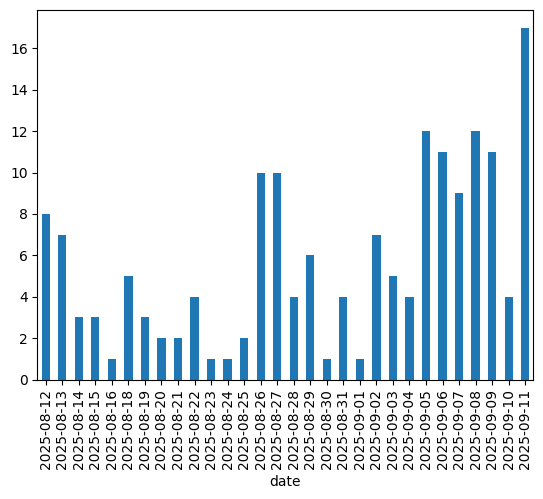

In [81]:
df["date"] = pd.to_datetime(df["date"], errors = "coerce")
df["date"].dt.date.value_counts().sort_index().plot(kind="bar")

In [82]:
print(df.dtypes)

title               object
company             object
location            object
url                 object
date        datetime64[ns]
dtype: object
